# Part 3 analysis

In [2]:
import pandas as pd
from colorama import Fore, Style, Back
import os

In [3]:
data_df = pd.read_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/dense_analysis_results_data.xlsx", sheet_name="raw data")
data_jats_df = pd.read_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/dense_analysis_results_data_jats.xlsx", sheet_name="raw data")
data_multi_lang_df = pd.read_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/dense_analysis_results_data_multi_lang.xlsx", sheet_name="raw data")
data_df.head(5)
data_jats_df.head(5)
#data_multi_lang_df.head(5)

,Unnamed: 0,Query,Precision,Recall,F1-Score,Accuracy,Balanced accuracy,Faithfulness score,Documents score,Response
0,0,which studies examined the abstract in metadata?,0.0,0.0,0.777778,0.777778,0.4375,0,"[(0.6342494, '10.1162/qss_a_00286'), (0.336658...",Summary: I'm afraid I couldn't find any studie...
1,1,which studies examined the abstract in metadata?,0.5,0.4,0.888889,0.888889,0.6750,3,"[(0.6342494, '10.1162/qss_a_00286'), (0.336658...",Summary: I found three studies that examined t...
2,2,which studies examined the abstract in metadata?,0.5,0.4,0.888889,0.888889,0.6750,2,"[(0.6342494, '10.1162/qss_a_00286'), (0.336658...",Summary: Two studies examined the abstract in ...
3,3,which studies examined the abstract in metadata?,0.5,0.4,0.888889,0.888889,0.6750,2,"[(0.6342494, '10.1162/qss_a_00286'), (0.336658...",Summary: Two studies examined the abstract in ...
4,4,which studies examined the abstract in metadata?,0.5,0.4,0.888889,0.888889,0.6750,2,"[(0.6342494, '10.1162/qss_a_00286'), (0.336658...",Summary: Two studies examined the abstract in ...


# Precision
look at precision values across all three datasets

In [4]:
# precision
data_df_grouped = data_df.groupby(data_df['Query'])[['Precision']].agg(['mean','max','min','std'])
data_df_grouped

Precision  ...          
                                                        mean  ...       std
Query                                                         ...          
How is RAG used to improve question answering o...  0.800000  ...  0.447214
Tell me about Crossref.                             0.800000  ...  0.447214
Tell me about OpenAlex.                             0.640000  ...  0.357771
What are the key features and limitations of Op...  0.690000  ...  0.245967
What are the main challenges in normalizing cit...  0.800000  ...  0.447214
What are the strengths and weaknesses of Web of...  0.680000  ...  0.156525
What is Crossref’s role in the scholarly resear...  0.600000  ...  0.335410
What methods are used to detect and correct err...  0.533333  ...  0.298142
Which papers address funding metadata, its avai...  0.720000  ...  0.178885
Which papers discuss the use of Retrieval-Augme...  0.480000  ...  0.268328
Which papers evaluate the linguistic coverage o...  0.480000  ...  0.268328
tell me about how RAG works.                        0.640000  ...  0.357771
which studies examined citations?                   0.800000  ...  0.447214
which studies examined the abstract in metadata?    0.600000  ...  0.000000

[14 rows x 4 columns]

In [5]:
# combine all into one df and look at boxplot
#data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)
data_df_precision = data_df[['Query', 'Precision']]
data_jats_df_precision = data_jats_df[['Query','Precision']]
data_multi_lang_df_precision = data_multi_lang_df[['Query','Precision']]
print(len(data_df_precision))
print(len(data_jats_df_precision))
data_combined_precision = data_df_precision.join(data_jats_df_precision, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_precision.drop(columns='Query_jats', inplace=True)
data_combined_precision = data_combined_precision.join(data_multi_lang_df_precision, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_precision.drop(columns='Query', inplace=True)
data_combined_precision = data_combined_precision.rename(columns={'Query_data':'Query','Precision_data':'Precision_data','Precision_jats':'Precision_jats','Precision':'Precision_multi_lang'})
data_combined_precision



70
70


,Query,Precision_data,Precision_jats,Precision_multi_lang
0,which studies examined the abstract in metadata?,0.6,0.0,0.4
1,which studies examined the abstract in metadata?,0.6,0.5,0.6
2,which studies examined the abstract in metadata?,0.6,0.5,0.6
3,which studies examined the abstract in metadata?,0.6,0.5,0.6
4,which studies examined the abstract in metadata?,0.6,0.5,0.6
...,...,...,...,...
65,tell me about how RAG works.,0.0,0.0,0.0
66,tell me about how RAG works.,0.8,0.6,0.8
67,tell me about how RAG works.,0.8,0.6,0.8
68,tell me about how RAG works.,0.8,0.6,0.8


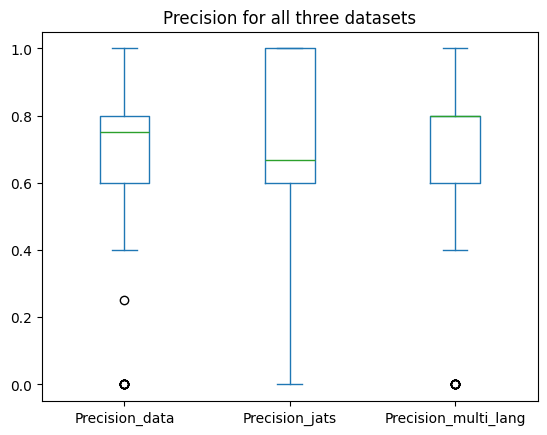

In [6]:
import matplotlib.pyplot as plt

data_combined_precision[['Precision_data','Precision_jats','Precision_multi_lang']].plot(kind='box',title='Precision for all three datasets')
plt.show()

In [7]:
# get mean, max, min
data_combined_precision_grouped = pd.DataFrame(data_combined_precision.groupby(data_combined_precision['Query'])[['Precision_data', 'Precision_jats','Precision_multi_lang']].agg('mean'))

data_combined_precision_data_avg = data_combined_precision_grouped['Precision_data'].mean()
data_combined_precision_data_jats_avg = data_combined_precision_grouped['Precision_jats'].mean()
data_combined_precision_data_multi_lang_avg = data_combined_precision_grouped['Precision_multi_lang'].mean()
print(f"Precision_data column mean: {data_combined_precision_data_avg:.4f}")
print(f"Precision_jats column mean: {data_combined_precision_data_jats_avg:.4f}")
print(f"Precision_multi_lang column mean: {data_combined_precision_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Precision_data':data_combined_precision_data_avg,
    'Precision_jats':data_combined_precision_data_jats_avg,
    'Precision_multi_lang':data_combined_precision_data_multi_lang_avg
}
precision_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{precision_grouped_means}"+Style.RESET_ALL)

# save out
data_combined_precision_grouped.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/tables/data_combined_precision_grouped.xlsx")
precision_grouped_means.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/tables/precision_grouped_means.xlsx")
data_combined_precision_grouped

Precision_data column mean: 0.6617
Precision_jats column mean: 0.6674
Precision_multi_lang column mean: 0.6381
   index  Precision_data  Precision_jats  Precision_multi_lang
0      0        0.661667        0.667381              0.638095


,Precision_data,Precision_jats,Precision_multi_lang
Query,,,
How is RAG used to improve question answering or information retrieval systems?,0.800000,0.800000,0.640000
Tell me about Crossref.,0.800000,0.800000,0.800000
Tell me about OpenAlex.,0.640000,1.000000,0.640000
What are the key features and limitations of OpenAlex as a bibliometric database?,0.690000,0.640000,0.640000
What are the main challenges in normalizing citation metrics across scientific fields?,0.800000,0.800000,0.800000
What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?,0.680000,0.560000,0.720000
What is Crossref’s role in the scholarly research ecosystem?,0.600000,0.800000,0.480000
What methods are used to detect and correct errors in bibliographic datasets?,0.533333,0.533333,0.533333
"Which papers address funding metadata, its availability, or its analysis in scholarly databases?",0.720000,0.720000,0.720000


# Recall scores

In [8]:
# precision
data_df_grouped = data_df.groupby(data_df['Query'])[['Recall']].agg(['mean','max','min','std'])
data_df_grouped

Recall  ...          
                                                        mean  ...       std
Query                                                         ...          
How is RAG used to improve question answering o...  0.800000  ...  0.447214
Tell me about Crossref.                             0.444444  ...  0.248452
Tell me about OpenAlex.                             0.457143  ...  0.255551
What are the key features and limitations of Op...  0.680000  ...  0.268328
What are the main challenges in normalizing cit...  0.160000  ...  0.089443
What are the strengths and weaknesses of Web of...  0.560000  ...  0.089443
What is Crossref’s role in the scholarly resear...  0.480000  ...  0.268328
What methods are used to detect and correct err...  0.320000  ...  0.178885
Which papers address funding metadata, its avai...  0.720000  ...  0.178885
Which papers discuss the use of Retrieval-Augme...  0.480000  ...  0.268328
Which papers evaluate the linguistic coverage o...  0.480000  ...  0.268328
tell me about how RAG works.                        0.640000  ...  0.357771
which studies examined citations?                   0.320000  ...  0.178885
which studies examined the abstract in metadata?    0.600000  ...  0.000000

[14 rows x 4 columns]

In [9]:
# combine all into one df and look at boxplot
#data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)
data_df_recall = data_df[['Query', 'Recall']]
data_jats_df_recall = data_jats_df[['Query','Recall']]
data_multi_lang_df_recall = data_multi_lang_df[['Query','Recall']]
print(len(data_df_recall))
print(len(data_jats_df_recall))
data_combined_recall = data_df_recall.join(data_jats_df_recall, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_recall.drop(columns='Query_jats', inplace=True)
data_combined_recall = data_combined_recall.join(data_multi_lang_df_recall, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_recall.drop(columns='Query', inplace=True)
data_combined_recall = data_combined_recall.rename(columns={'Query_data':'Query','Recall_data':'Recall_data','Recall_jats':'Recall_jats','Recall':'Recall_multi_lang'})
data_combined_recall

70
70


,Query,Recall_data,Recall_jats,Recall_multi_lang
0,which studies examined the abstract in metadata?,0.6,0.0,0.4
1,which studies examined the abstract in metadata?,0.6,0.4,0.6
2,which studies examined the abstract in metadata?,0.6,0.4,0.6
3,which studies examined the abstract in metadata?,0.6,0.4,0.6
4,which studies examined the abstract in metadata?,0.6,0.4,0.6
...,...,...,...,...
65,tell me about how RAG works.,0.0,0.0,0.0
66,tell me about how RAG works.,0.8,0.6,0.8
67,tell me about how RAG works.,0.8,0.6,0.8
68,tell me about how RAG works.,0.8,0.6,0.8


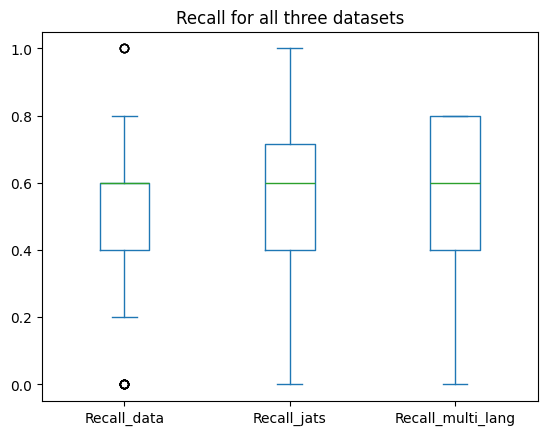

In [10]:
data_combined_recall[['Recall_data','Recall_jats','Recall_multi_lang']].plot(kind='box',title='Recall for all three datasets')
plt.show()

In [11]:
# get mean, max, min
data_combined_recall_grouped = pd.DataFrame(data_combined_recall.groupby(data_combined_recall['Query'])[['Recall_data', 'Recall_jats','Recall_multi_lang']].agg('mean'))

data_combined_recall_data_avg = data_combined_recall_grouped['Recall_data'].mean()
data_combined_recall_data_jats_avg = data_combined_recall_grouped['Recall_jats'].mean()
data_combined_recall_data_multi_lang_avg = data_combined_recall_grouped['Recall_multi_lang'].mean()
print(f"Recall_data column mean: {data_combined_recall_data_avg:.4f}")
print(f"Recall_jats column mean: {data_combined_recall_data_jats_avg:.4f}")
print(f"Recall_multi_lang column mean: {data_combined_recall_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Recall_data':data_combined_recall_data_avg,
    'Recall_jats':data_combined_recall_data_jats_avg,
    'Recall_multi_lang':data_combined_recall_data_multi_lang_avg
}
recall_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{recall_grouped_means}"+Style.RESET_ALL)

# save out
data_combined_recall_grouped.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/tables/data_combined_recall_grouped.xlsx")
recall_grouped_means.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/tables/recall_grouped_means.xlsx")
data_combined_recall_grouped

Recall_data column mean: 0.5101
Recall_jats column mean: 0.5085
Recall_multi_lang column mean: 0.5158
   index  Recall_data  Recall_jats  Recall_multi_lang
0      0     0.510113     0.508481           0.515828


,Recall_data,Recall_jats,Recall_multi_lang
Query,,,
How is RAG used to improve question answering or information retrieval systems?,0.800000,0.800000,0.640000
Tell me about Crossref.,0.444444,0.444444,0.444444
Tell me about OpenAlex.,0.457143,0.714286,0.457143
What are the key features and limitations of OpenAlex as a bibliometric database?,0.680000,0.640000,0.640000
What are the main challenges in normalizing citation metrics across scientific fields?,0.160000,0.160000,0.160000
What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?,0.560000,0.560000,0.720000
What is Crossref’s role in the scholarly research ecosystem?,0.480000,0.640000,0.480000
What methods are used to detect and correct errors in bibliographic datasets?,0.320000,0.320000,0.320000
"Which papers address funding metadata, its availability, or its analysis in scholarly databases?",0.720000,0.720000,0.720000


# F1 scores

In [12]:
# F1 scores
data_df_grouped = data_df.groupby(data_df['Query'])[['F1-Score']].agg(['mean','max','min','std'])
data_df_grouped

F1-Score  ...          
                                                        mean  ...       std
Query                                                         ...          
How is RAG used to improve question answering o...  0.960000  ...  0.089443
Tell me about Crossref.                             0.866667  ...  0.099381
Tell me about OpenAlex.                             0.888889  ...  0.049690
What are the key features and limitations of Op...  0.933333  ...  0.049690
What are the main challenges in normalizing cit...  0.884444  ...  0.059628
What are the strengths and weaknesses of Web of...  0.920000  ...  0.029814
What is Crossref’s role in the scholarly resear...  0.902222  ...  0.069567
What methods are used to detect and correct err...  0.902222  ...  0.019876
Which papers address funding metadata, its avai...  0.937778  ...  0.039752
Which papers discuss the use of Retrieval-Augme...  0.884444  ...  0.059628
Which papers evaluate the linguistic coverage o...  0.884444  ...  0.059628
tell me about how RAG works.                        0.928889  ...  0.059628
which studies examined citations?                   0.902222  ...  0.069567
which studies examined the abstract in metadata?    0.911111  ...  0.000000

[14 rows x 4 columns]

In [13]:
# combine all into one df and look at boxplot
#data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)
data_df_F1 = data_df[['Query', 'F1-Score']]
data_jats_df_F1 = data_jats_df[['Query','F1-Score']]
data_multi_lang_df_F1 = data_multi_lang_df[['Query','F1-Score']]
print(len(data_df_F1))
print(len(data_jats_df_F1))
data_combined_F1 = data_df_F1.join(data_jats_df_F1, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_F1.drop(columns='Query_jats', inplace=True)
data_combined_F1 = data_combined_F1.join(data_multi_lang_df_F1, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_F1.drop(columns='Query', inplace=True)
data_combined_F1 = data_combined_F1.rename(columns={'Query_data':'Query','F1-Score_data':'F1-Score_data','F1-Score_jats':'F1-Score_jats','F1-Score':'F1-Score_multi_lang'})
data_combined_F1

70
70


,Query,F1-Score_data,F1-Score_jats,F1-Score_multi_lang
0,which studies examined the abstract in metadata?,0.911111,0.777778,0.866667
1,which studies examined the abstract in metadata?,0.911111,0.888889,0.911111
2,which studies examined the abstract in metadata?,0.911111,0.888889,0.911111
3,which studies examined the abstract in metadata?,0.911111,0.888889,0.911111
4,which studies examined the abstract in metadata?,0.911111,0.888889,0.911111
...,...,...,...,...
65,tell me about how RAG works.,0.822222,0.822222,0.822222
66,tell me about how RAG works.,0.955556,0.911111,0.955556
67,tell me about how RAG works.,0.955556,0.911111,0.955556
68,tell me about how RAG works.,0.955556,0.911111,0.955556


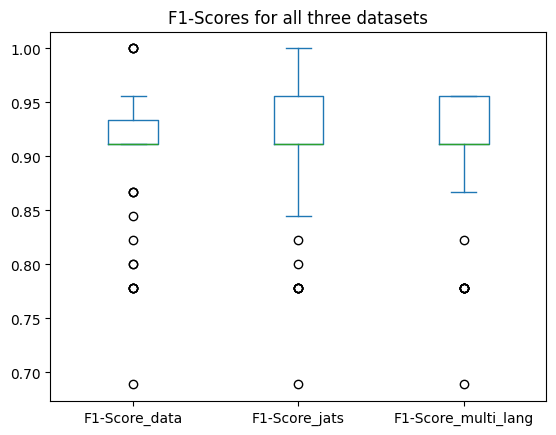

In [14]:
data_combined_F1[['F1-Score_data','F1-Score_jats','F1-Score_multi_lang']].plot(kind='box',title='F1-Scores for all three datasets')
plt.show()

In [15]:
# get mean, max, min
data_combined_F1_grouped = pd.DataFrame(data_combined_F1.groupby(data_combined_F1['Query'])[['F1-Score_data', 'F1-Score_jats','F1-Score_multi_lang']].agg('mean'))

data_combined_F1_data_avg = data_combined_F1_grouped['F1-Score_data'].mean()
data_combined_F1_data_jats_avg = data_combined_F1_grouped['F1-Score_jats'].mean()
data_combined_F1_data_multi_lang_avg = data_combined_F1_grouped['F1-Score_multi_lang'].mean()
print(f"F1_data column mean: {data_combined_F1_data_avg:.4f}")
print(f"F1_jats column mean: {data_combined_F1_data_jats_avg:.4f}")
print(f"F1_multi_lang column mean: {data_combined_F1_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'F1-Score_data':data_combined_F1_data_avg,
    'F1-Score_jats':data_combined_F1_data_jats_avg,
    'F1-Score_multi_lang':data_combined_F1_data_multi_lang_avg
}
F1_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{F1_grouped_means}"+Style.RESET_ALL)

# save out
data_combined_F1_grouped.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/tables/data_combined_F1_grouped.xlsx")
F1_grouped_means.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/tables/F1_grouped_means.xlsx")
data_combined_F1_grouped

F1_data column mean: 0.9076
F1_jats column mean: 0.9079
F1_multi_lang column mean: 0.9041
   index  F1-Score_data  F1-Score_jats  F1-Score_multi_lang
0      0       0.907619       0.907937             0.904127


,F1-Score_data,F1-Score_jats,F1-Score_multi_lang
Query,,,
How is RAG used to improve question answering or information retrieval systems?,0.960000,0.955556,0.920000
Tell me about Crossref.,0.866667,0.866667,0.866667
Tell me about OpenAlex.,0.888889,0.955556,0.884444
What are the key features and limitations of OpenAlex as a bibliometric database?,0.933333,0.924444,0.920000
What are the main challenges in normalizing citation metrics across scientific fields?,0.884444,0.884444,0.884444
What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?,0.920000,0.902222,0.937778
What is Crossref’s role in the scholarly research ecosystem?,0.902222,0.937778,0.884444
What methods are used to detect and correct errors in bibliographic datasets?,0.902222,0.902222,0.902222
"Which papers address funding metadata, its availability, or its analysis in scholarly databases?",0.937778,0.937778,0.937778


# Accuracy

In [16]:
# accuracy scores
data_df_grouped = data_df.groupby(data_df['Query'])[['Accuracy']].agg(['mean','max','min','std'])
data_df_grouped

Accuracy  ...          
                                                        mean  ...       std
Query                                                         ...          
How is RAG used to improve question answering o...  0.960000  ...  0.089443
Tell me about Crossref.                             0.866667  ...  0.099381
Tell me about OpenAlex.                             0.888889  ...  0.049690
What are the key features and limitations of Op...  0.933333  ...  0.049690
What are the main challenges in normalizing cit...  0.884444  ...  0.059628
What are the strengths and weaknesses of Web of...  0.920000  ...  0.029814
What is Crossref’s role in the scholarly resear...  0.902222  ...  0.069567
What methods are used to detect and correct err...  0.902222  ...  0.019876
Which papers address funding metadata, its avai...  0.937778  ...  0.039752
Which papers discuss the use of Retrieval-Augme...  0.884444  ...  0.059628
Which papers evaluate the linguistic coverage o...  0.884444  ...  0.059628
tell me about how RAG works.                        0.928889  ...  0.059628
which studies examined citations?                   0.902222  ...  0.069567
which studies examined the abstract in metadata?    0.911111  ...  0.000000

[14 rows x 4 columns]

In [17]:
# combine all into one df and look at boxplot

data_df_accuracy = data_df[['Query', 'Accuracy']]
data_jats_df_accuracy = data_jats_df[['Query','Accuracy']]
data_multi_lang_df_accuracy = data_multi_lang_df[['Query','Accuracy']]
print(len(data_df_accuracy))
print(len(data_jats_df_accuracy))
data_combined_accuracy = data_df_accuracy.join(data_jats_df_accuracy, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_accuracy.drop(columns='Query_jats', inplace=True)
data_combined_accuracy = data_combined_accuracy.join(data_multi_lang_df_accuracy, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_accuracy.drop(columns='Query', inplace=True)
data_combined_accuracy = data_combined_accuracy.rename(columns={'Query_data':'Query','Accuracy_data':'Accuracy_data','Accuracy_jats':'Accuracy_jats','Accuracy':'Accuracy_multi_lang'})
data_combined_accuracy

70
70


,Query,Accuracy_data,Accuracy_jats,Accuracy_multi_lang
0,which studies examined the abstract in metadata?,0.911111,0.777778,0.866667
1,which studies examined the abstract in metadata?,0.911111,0.888889,0.911111
2,which studies examined the abstract in metadata?,0.911111,0.888889,0.911111
3,which studies examined the abstract in metadata?,0.911111,0.888889,0.911111
4,which studies examined the abstract in metadata?,0.911111,0.888889,0.911111
...,...,...,...,...
65,tell me about how RAG works.,0.822222,0.822222,0.822222
66,tell me about how RAG works.,0.955556,0.911111,0.955556
67,tell me about how RAG works.,0.955556,0.911111,0.955556
68,tell me about how RAG works.,0.955556,0.911111,0.955556


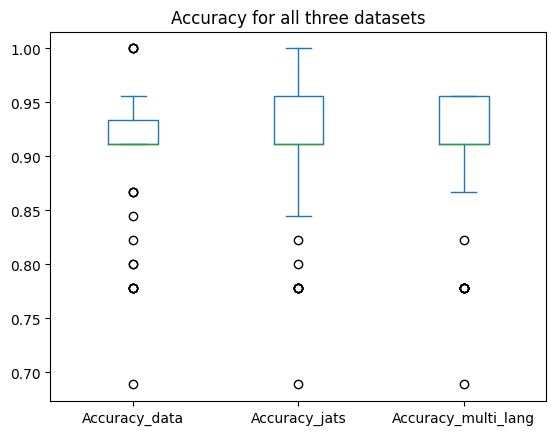

In [18]:
data_combined_accuracy[['Accuracy_data','Accuracy_jats','Accuracy_multi_lang']].plot(kind='box',title='Accuracy for all three datasets')
plt.show()

In [19]:
# get mean, max, min
data_combined_accuracy_grouped = pd.DataFrame(data_combined_accuracy.groupby(data_combined_accuracy['Query'])[['Accuracy_data', 'Accuracy_jats','Accuracy_multi_lang']].agg('mean'))

data_combined_accuracy_data_avg = data_combined_accuracy_grouped['Accuracy_data'].mean()
data_combined_accuracy_data_jats_avg = data_combined_accuracy_grouped['Accuracy_jats'].mean()
data_combined_accuracy_data_multi_lang_avg = data_combined_accuracy_grouped['Accuracy_multi_lang'].mean()
print(f"accuracy_data column mean: {data_combined_accuracy_data_avg:.4f}")
print(f"accuracy_jats column mean: {data_combined_accuracy_data_jats_avg:.4f}")
print(f"accuracy_multi_lang column mean: {data_combined_accuracy_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Accuracy_data':data_combined_accuracy_data_avg,
    'Accuracy_jats':data_combined_accuracy_data_jats_avg,
    'Accuracy_multi_lang':data_combined_accuracy_data_multi_lang_avg
}
accuracy_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{accuracy_grouped_means}"+Style.RESET_ALL)

# save out
data_combined_accuracy_grouped.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/tables/data_combined_accuracy_grouped.xlsx")
accuracy_grouped_means.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/tables/accuracy_grouped_means.xlsx")
data_combined_accuracy_grouped

accuracy_data column mean: 0.9076
accuracy_jats column mean: 0.9079
accuracy_multi_lang column mean: 0.9041
   index  Accuracy_data  Accuracy_jats  Accuracy_multi_lang
0      0       0.907619       0.907937             0.904127


,Accuracy_data,Accuracy_jats,Accuracy_multi_lang
Query,,,
How is RAG used to improve question answering or information retrieval systems?,0.960000,0.955556,0.920000
Tell me about Crossref.,0.866667,0.866667,0.866667
Tell me about OpenAlex.,0.888889,0.955556,0.884444
What are the key features and limitations of OpenAlex as a bibliometric database?,0.933333,0.924444,0.920000
What are the main challenges in normalizing citation metrics across scientific fields?,0.884444,0.884444,0.884444
What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?,0.920000,0.902222,0.937778
What is Crossref’s role in the scholarly research ecosystem?,0.902222,0.937778,0.884444
What methods are used to detect and correct errors in bibliographic datasets?,0.902222,0.902222,0.902222
"Which papers address funding metadata, its availability, or its analysis in scholarly databases?",0.937778,0.937778,0.937778


# Balanced accuracy

In [20]:
# accuracy scores
data_df_grouped = data_df.groupby(data_df['Query'])[['Balanced accuracy']].agg(['mean','max','min','std'])
data_df_grouped

Balanced accuracy  ...          
                                                                mean  ...       std
Query                                                                 ...          
How is RAG used to improve question answering o...          0.890000  ...  0.245967
Tell me about Crossref.                                     0.708333  ...  0.155282
Tell me about OpenAlex.                                     0.712782  ...  0.133660
What are the key features and limitations of Op...          0.822500  ...  0.145344
What are the main challenges in normalizing cit...          0.567500  ...  0.072672
What are the strengths and weaknesses of Web of...          0.762500  ...  0.055902
What is Crossref’s role in the scholarly resear...          0.717500  ...  0.156525
What methods are used to detect and correct err...          0.647500  ...  0.089443
Which papers address funding metadata, its avai...          0.842500  ...  0.100623
Which papers discuss the use of Retrieval-Augme...          0.707500  ...  0.150935
Which papers evaluate the linguistic coverage o...          0.707500  ...  0.150935
tell me about how RAG works.                                0.802500  ...  0.190066
which studies examined citations?                           0.647500  ...  0.117394
which studies examined the abstract in metadata?            0.775000  ...  0.000000

[14 rows x 4 columns]

In [21]:
# combine into one df
data_df_bal_accuracy = data_df[['Query', 'Balanced accuracy']]
data_jats_df_bal_accuracy = data_jats_df[['Query','Balanced accuracy']]
data_multi_lang_df_bal_accuracy = data_multi_lang_df[['Query','Balanced accuracy']]
print(len(data_df_bal_accuracy))
print(len(data_jats_df_bal_accuracy))
data_combined_bal_accuracy = data_df_bal_accuracy.join(data_jats_df_bal_accuracy, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_bal_accuracy.drop(columns='Query_jats', inplace=True)
data_combined_bal_accuracy = data_combined_bal_accuracy.join(data_multi_lang_df_bal_accuracy, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_bal_accuracy.drop(columns='Query', inplace=True)
data_combined_bal_accuracy = data_combined_bal_accuracy.rename(columns={'Query_data':'Query','Balanced accuracy_data':'Balanced accuracy_data','Balanced accuracy_jats':'Balanced accuracy_jats','Balanced accuracy':'Balanced accuracy_multi_lang'})
data_combined_bal_accuracy

70
70


,Query,Balanced accuracy_data,Balanced accuracy_jats,Balanced accuracy_multi_lang
0,which studies examined the abstract in metadata?,0.7750,0.4375,0.6625
1,which studies examined the abstract in metadata?,0.7750,0.6750,0.7750
2,which studies examined the abstract in metadata?,0.7750,0.6750,0.7750
3,which studies examined the abstract in metadata?,0.7750,0.6750,0.7750
4,which studies examined the abstract in metadata?,0.7750,0.6750,0.7750
...,...,...,...,...
65,tell me about how RAG works.,0.4625,0.4625,0.4625
66,tell me about how RAG works.,0.8875,0.7750,0.8875
67,tell me about how RAG works.,0.8875,0.7750,0.8875
68,tell me about how RAG works.,0.8875,0.7750,0.8875


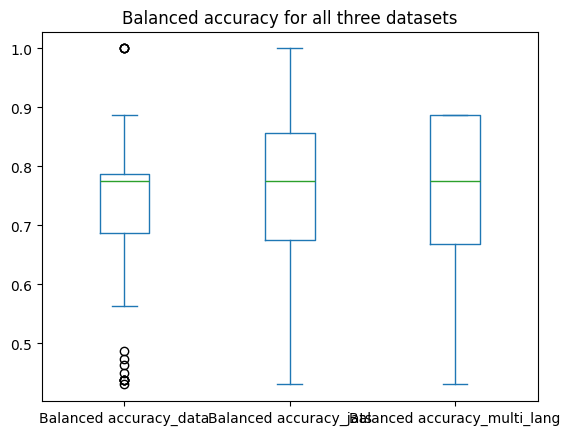

In [22]:
data_combined_bal_accuracy[['Balanced accuracy_data','Balanced accuracy_jats','Balanced accuracy_multi_lang']].plot(kind='box',title='Balanced accuracy for all three datasets')
plt.show()

In [23]:
# get mean, max, min
data_combined_bal_accuracy_grouped = pd.DataFrame(data_combined_bal_accuracy.groupby(data_combined_bal_accuracy['Query'])[['Balanced accuracy_data', 'Balanced accuracy_jats','Balanced accuracy_multi_lang']].agg('mean'))

data_combined_bal_accuracy_data_avg = data_combined_bal_accuracy_grouped['Balanced accuracy_data'].mean()
data_combined_bal_accuracy_data_jats_avg = data_combined_bal_accuracy_grouped['Balanced accuracy_jats'].mean()
data_combined_bal_accuracy_data_multi_lang_avg = data_combined_bal_accuracy_grouped['Balanced accuracy_multi_lang'].mean()
print(f"bal_accuracy_data column mean: {data_combined_bal_accuracy_data_avg:.4f}")
print(f"bal_accuracy_jats column mean: {data_combined_bal_accuracy_data_jats_avg:.4f}")
print(f"bal_accuracy_multi_lang column mean: {data_combined_bal_accuracy_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Balanced accuracy_data':data_combined_bal_accuracy_data_avg,
    'Balanced accuracy_jats':data_combined_bal_accuracy_data_jats_avg,
    'Balanced accuracy_multi_lang':data_combined_bal_accuracy_data_multi_lang_avg
}
bal_accuracy_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{bal_accuracy_grouped_means}"+Style.RESET_ALL)

# save out
data_combined_bal_accuracy_grouped.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/tables/data_combined_bal_accuracy_grouped.xlsx")
bal_accuracy_grouped_means.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/tables/bal_accuracy_grouped_means.xlsx")
data_combined_bal_accuracy_grouped

bal_accuracy_data column mean: 0.7365
bal_accuracy_jats column mean: 0.7356
bal_accuracy_multi_lang column mean: 0.7370
   index  ...  Balanced accuracy_multi_lang
0      0  ...                      0.737035

[1 rows x 4 columns]


,Balanced accuracy_data,Balanced accuracy_jats,Balanced accuracy_multi_lang
Query,,,
How is RAG used to improve question answering or information retrieval systems?,0.890000,0.887500,0.797500
Tell me about Crossref.,0.708333,0.708333,0.708333
Tell me about OpenAlex.,0.712782,0.857143,0.710150
What are the key features and limitations of OpenAlex as a bibliometric database?,0.822500,0.800000,0.797500
What are the main challenges in normalizing citation metrics across scientific fields?,0.567500,0.567500,0.567500
What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?,0.762500,0.752500,0.842500
What is Crossref’s role in the scholarly research ecosystem?,0.717500,0.807500,0.707500
What methods are used to detect and correct errors in bibliographic datasets?,0.647500,0.647500,0.647500
"Which papers address funding metadata, its availability, or its analysis in scholarly databases?",0.842500,0.842500,0.842500


# Faithfulness score


In [24]:
#Faithfulness score
data_df_grouped = data_df.groupby(data_df['Query'])[['Faithfulness score']].agg(['mean','max','min','std'])
data_df_grouped

Faithfulness score  ...          
                                                                 mean  ...       std
Query                                                                  ...          
How is RAG used to improve question answering o...                4.0  ...  2.236068
Tell me about Crossref.                                           3.2  ...  2.489980
Tell me about OpenAlex.                                           3.8  ...  2.167948
What are the key features and limitations of Op...                4.0  ...  2.236068
What are the main challenges in normalizing cit...                0.8  ...  0.447214
What are the strengths and weaknesses of Web of...                1.8  ...  1.095445
What is Crossref’s role in the scholarly resear...                1.4  ...  1.516575
What methods are used to detect and correct err...                2.4  ...  1.341641
Which papers address funding metadata, its avai...                4.0  ...  1.732051
Which papers discuss the use of Retrieval-Augme...                4.0  ...  2.236068
Which papers evaluate the linguistic coverage o...                3.0  ...  2.000000
tell me about how RAG works.                                      4.0  ...  2.236068
which studies examined citations?                                 1.6  ...  0.894427
which studies examined the abstract in metadata?                  4.0  ...  0.000000

[14 rows x 4 columns]

In [25]:
# combine into one df
data_df_faithfulness = data_df[['Query', 'Faithfulness score']]
data_jats_df_faithfulness = data_jats_df[['Query','Faithfulness score']]
data_multi_lang_df_faithfulness = data_multi_lang_df[['Query','Faithfulness score']]
print(len(data_df_faithfulness))
print(len(data_jats_df_faithfulness))
data_combined_faithfulness = data_df_faithfulness.join(data_jats_df_faithfulness, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_faithfulness.drop(columns='Query_jats', inplace=True)
data_combined_faithfulness = data_combined_faithfulness.join(data_multi_lang_df_faithfulness, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_faithfulness.drop(columns='Query', inplace=True)
data_combined_faithfulness = data_combined_faithfulness.rename(columns={'Query_data':'Query','Faithfulness score_data':'Faithfulness score_data','Faithfulness score_jats':'Faithfulness score_jats','Faithfulness score':'Faithfulness score_multi_lang'})
data_combined_faithfulness

70
70


,Query,Faithfulness score_data,Faithfulness score_jats,Faithfulness score_multi_lang
0,which studies examined the abstract in metadata?,4,0,2
1,which studies examined the abstract in metadata?,4,3,4
2,which studies examined the abstract in metadata?,4,2,3
3,which studies examined the abstract in metadata?,4,2,4
4,which studies examined the abstract in metadata?,4,2,4
...,...,...,...,...
65,tell me about how RAG works.,0,0,0
66,tell me about how RAG works.,5,5,5
67,tell me about how RAG works.,5,1,5
68,tell me about how RAG works.,5,5,5


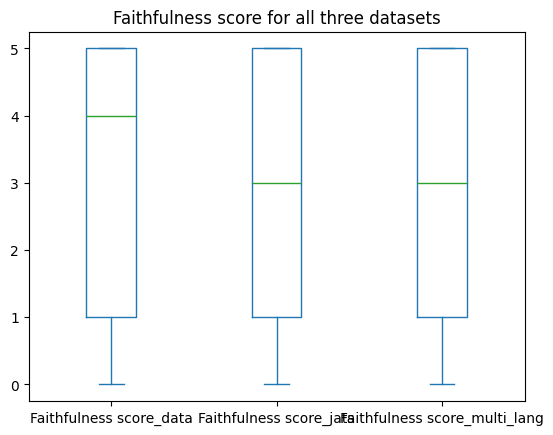

In [26]:
data_combined_faithfulness[['Faithfulness score_data','Faithfulness score_jats','Faithfulness score_multi_lang']].plot(kind='box',title='Faithfulness score for all three datasets')
plt.show()

In [27]:
# get mean, max, min
data_combined_faithfulness_grouped = pd.DataFrame(data_combined_faithfulness.groupby(data_combined_faithfulness['Query'])[['Faithfulness score_data', 'Faithfulness score_jats','Faithfulness score_multi_lang']].agg('mean'))

data_combined_faithfulness_data_avg = data_combined_faithfulness_grouped['Faithfulness score_data'].mean()
data_combined_faithfulness_data_jats_avg = data_combined_faithfulness_grouped['Faithfulness score_jats'].mean()
data_combined_faithfulness_data_multi_lang_avg = data_combined_faithfulness_grouped['Faithfulness score_multi_lang'].mean()
print(f"faithfulness_data column mean: {data_combined_faithfulness_data_avg:.4f}")
print(f"faithfulness_jats column mean: {data_combined_faithfulness_data_jats_avg:.4f}")
print(f"faithfulness_multi_lang column mean: {data_combined_faithfulness_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Faithfulness score_data':data_combined_faithfulness_data_avg,
    'Faithfulness score_jats':data_combined_faithfulness_data_jats_avg,
    'Faithfulness score_multi_lang':data_combined_faithfulness_data_multi_lang_avg
}
faithfulness_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{faithfulness_grouped_means}"+Style.RESET_ALL)

# save out
data_combined_faithfulness_grouped.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/tables/data_combined_faithfulness_grouped.xlsx")
faithfulness_grouped_means.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/tables/faithfulness_grouped_means.xlsx")
data_combined_faithfulness_grouped

faithfulness_data column mean: 3.0000
faithfulness_jats column mean: 2.8571
faithfulness_multi_lang column mean: 2.9714
   index  ...  Faithfulness score_multi_lang
0      0  ...                       2.971429

[1 rows x 4 columns]


,Faithfulness score_data,Faithfulness score_jats,Faithfulness score_multi_lang
Query,,,
How is RAG used to improve question answering or information retrieval systems?,4.0,4.0,4.0
Tell me about Crossref.,3.2,2.4,2.4
Tell me about OpenAlex.,3.8,5.0,4.0
What are the key features and limitations of OpenAlex as a bibliometric database?,4.0,4.0,3.8
What are the main challenges in normalizing citation metrics across scientific fields?,0.8,0.8,0.8
What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?,1.8,1.8,2.4
What is Crossref’s role in the scholarly research ecosystem?,1.4,2.6,1.6
What methods are used to detect and correct errors in bibliographic datasets?,2.4,2.4,2.0
"Which papers address funding metadata, its availability, or its analysis in scholarly databases?",4.0,3.8,3.4


# Documents score


In [97]:
# Documents score
from ast import literal_eval
data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)

data_documents_score_df = pd.DataFrame(data_df['Documents score'])
data_jats_documents_score_df = pd.DataFrame(data_jats_df['Documents score'])
data_multi_lang_documents_score_df = pd.DataFrame(data_multi_lang_df['Documents score'])
#read the strings as literals
data_documents_score_df['Documents score'] = data_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
data_jats_documents_score_df['Documents score'] = data_jats_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
data_multi_lang_documents_score_df['Documents score'] = data_multi_lang_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
#explode nested lists into one column
data_documents_score_flatten = data_documents_score_df.explode(column='Documents score')
data_jats_documents_score_flatten = data_jats_documents_score_df.explode(column='Documents score')
data_multi_lang_documents_score_flatten = data_multi_lang_documents_score_df.explode(column='Documents score')
#separate tuple into columns
data_documents_exploded = pd.DataFrame()
data_documents_exploded[['Score','DOI']] = pd.DataFrame(data_documents_score_flatten['Documents score'].tolist(),index=data_documents_score_flatten.index)
print(len(data_documents_score_flatten))
cols = list(data_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_documents_exploded = data_documents_exploded[cols]
data_documents_exploded

#same again for jats dataset
data_jats_documents_exploded = pd.DataFrame()
data_jats_documents_exploded[['Score','DOI']] = pd.DataFrame(data_jats_documents_score_flatten['Documents score'].tolist(),index=data_jats_documents_score_flatten.index)
print(Fore.LIGHTGREEN_EX + f"length of jats: {len(data_jats_documents_score_flatten)}")
cols = list(data_jats_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_jats_documents_exploded = data_jats_documents_exploded[cols]
data_jats_documents_exploded

# and again for multi_lang dataset
data_multi_lang_documents_exploded = pd.DataFrame()
data_multi_lang_documents_exploded[['Score','DOI']] = pd.DataFrame(data_multi_lang_documents_score_flatten['Documents score'].tolist(),index=data_multi_lang_documents_score_flatten.index)
print(Fore.LIGHTCYAN_EX + f"length of multi_lang: {len(data_multi_lang_documents_score_flatten)}")
cols = list(data_multi_lang_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_multi_lang_documents_exploded = data_multi_lang_documents_exploded[cols]
data_multi_lang_documents_exploded

295
length of jats: 295
length of multi_lang: 310


,DOI,Score
0,10.1162/qss_a_00286,0.629069
0,10.31222/osf.io/smxe5,0.256856
0,10.3145/epi.2023.mar.09,0.208905
0,10.1002/leap.1411,0.140537
0,10.31274/b8136f97.ccc3dae4,0.132931
...,...,...
69,10.1007/978-3-031-88708-6_3,0.662819
69,10.48550/arXiv.2312.10997,0.584082
69,10.48550/arXiv.2505.18247,0.510619
69,10.48550/arXiv.2406.13213,0.449852


In [167]:
# create a df with all mean scores for each DOI
data_documents_score_grouped = pd.DataFrame(data_documents_exploded.groupby(data_documents_exploded['DOI'])['Score'].agg(['mean']))
data_documents_score_grouped = data_documents_score_grouped.sort_values('mean',ascending=False)
data_documents_score_grouped

data_jats_documents_score_grouped = pd.DataFrame(data_jats_documents_exploded.groupby(data_jats_documents_exploded['DOI'])['Score'].agg(['mean']))
data_jats_documents_score_grouped

data_multi_lang_documents_score_grouped = pd.DataFrame(data_multi_lang_documents_exploded.groupby(data_multi_lang_documents_exploded['DOI'])['Score'].agg(['mean']))
data_multi_lang_documents_score_grouped
# reset index so that DOI is a proper column
data_documents_score_grouped.reset_index(inplace=True,drop=False)
data_jats_documents_score_grouped.reset_index(inplace=True,drop=False)
data_multi_lang_documents_score_grouped.reset_index(inplace=True,drop=False)


data_documents_score_grouped_together = data_documents_score_grouped.merge(data_jats_documents_score_grouped,left_on='DOI',right_on='DOI')
data_documents_score_grouped_together = data_documents_score_grouped_together.merge(data_multi_lang_documents_score_grouped, left_on='DOI', right_on='DOI')
data_documents_score_grouped_together.rename(inplace=True, columns={'DOI':'DOI',
                                                                    'mean_x':'data_mean',
                                                                    'mean_y':'jats_mean',
                                                                    'mean':'multi_lang_mean'})

# save out
data_documents_score_grouped_together.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/tables/data_documents_score_grouped_together.xlsx")

data_documents_score_grouped_together

,DOI,data_mean,jats_mean,multi_lang_mean
0,10.1371/journal.pbio.1002542,0.936940,0.932065,0.523392
1,10.48550/arXiv.2410.04231,0.861364,0.862757,0.886116
2,10.1609/aaai.v38i16.29728,0.853633,0.844935,0.897633
3,10.1162/qss_a_00022,0.852342,0.859733,0.863960
4,10.6109/jkiice.2023.27.12.1489,0.768265,0.546896,0.758099
5,10.5281/ZENODO.13960973,0.738462,0.722077,0.748959
6,10.1007/978-3-031-88708-6_3,0.727082,0.728779,0.733988
7,10.48550/arXiv.2312.10997,0.718780,0.906728,0.634633
8,10.48550/arXiv.2406.13213,0.687616,0.690000,0.665936
9,10.48550/arXiv.2409.10633,0.586206,0.600914,0.713227


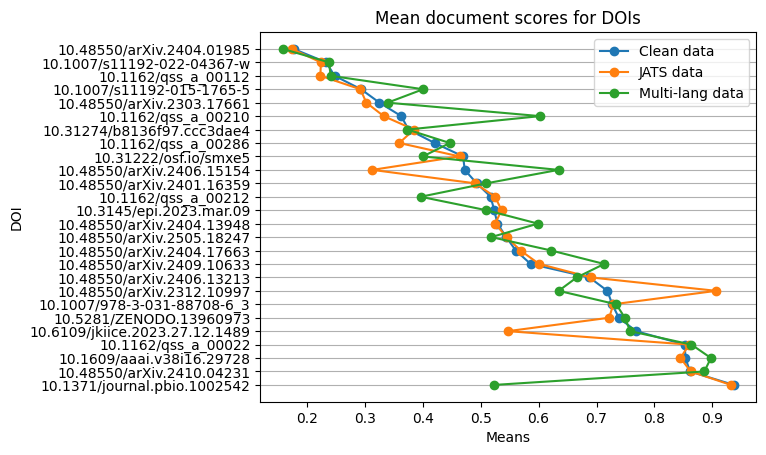

In [148]:
fig,ax = plt.subplots()
plt.plot(data_documents_score_grouped_together[['data_mean','jats_mean','multi_lang_mean']],
        data_documents_score_grouped_together['DOI'],
        marker='o',
        linestyle='-',data=data_documents_score_grouped_together)
plt.xlabel('Means')
plt.ylabel('DOI')
plt.title("Mean document scores for DOIs")
ax.legend(('Clean data', 'JATS data', 'Multi-lang data'), loc='upper right')
plt.grid(visible=True,axis='y')
plt.show()

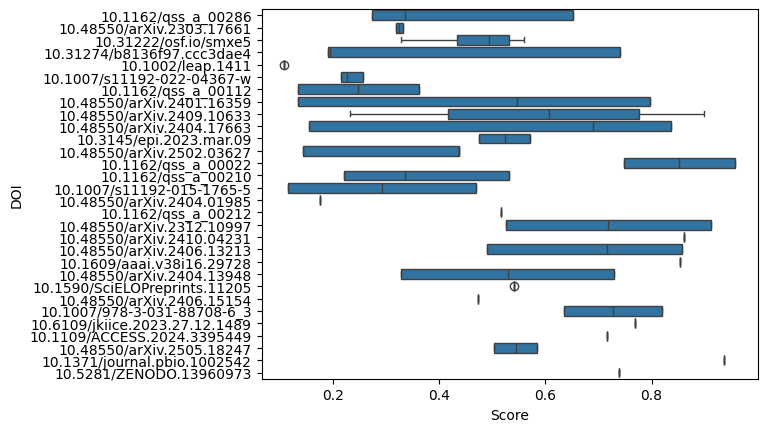

In [43]:
#box plot of data_documents_exploded['DOI']
import seaborn as sns
sns.boxplot(x=data_documents_exploded['Score'],
            y=data_documents_exploded['DOI'],
            data=data_documents_exploded,)
plt.show()

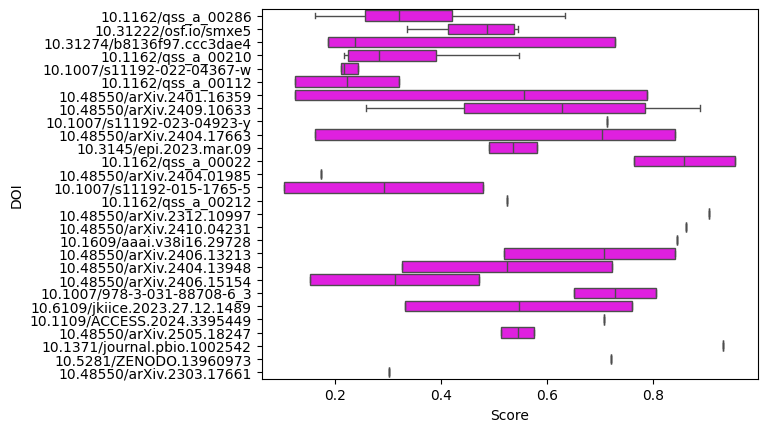

In [51]:
sns.boxplot(x=data_jats_documents_exploded['Score'],
            y=data_jats_documents_exploded['DOI'],
            data=data_jats_documents_exploded,
            color='magenta',
            )
plt.show()

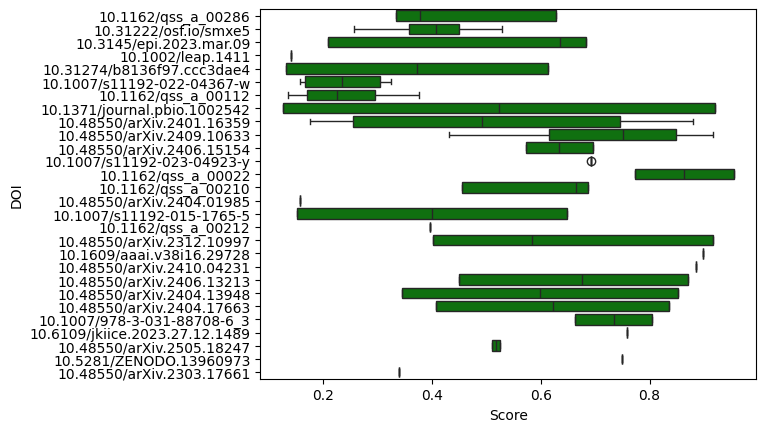

In [52]:
sns.boxplot(x=data_multi_lang_documents_exploded['Score'],
            y=data_multi_lang_documents_exploded['DOI'],
            data=data_multi_lang_documents_exploded,
            color='green',
            )
plt.show()

In [120]:
# join the sets together:data_documents_exploded, data_jats_documents_exploded, data_multi_lang_documents_exploded

data_combined_doc_score = data_documents_score_grouped.merge(data_jats_documents_score, left_on='DOI', right_on='DOI', how='inner', suffixes=('_data','_jats'))
data_combined_doc_score = data_combined_doc_score.merge(data_multi_lang_documents_exploded, on='DOI', how='inner')
data_combined_doc_score = data_combined_doc_score.rename(columns={'DOI':'DOI',
                                                            'Score_data':'Score_data',
                                                            'Score_jats':'Score_jats',
                                                            'Score':'Score_multi_lang'})
data_combined_doc_score
# reset index 

295

In [44]:
# count of DOIs - how is this different than golden set
data_documents_score_count = pd.DataFrame(data_documents_exploded.groupby(data_documents_exploded['DOI']).count())
data_documents_score_count = data_documents_score_count.sort_values('Score',ascending=False)

#save out
data_documents_score_count.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/tables/data_documents_score_count.xlsx")

data_documents_score_count

,Score
DOI,
10.31222/osf.io/smxe5,20
10.48550/arXiv.2409.10633,20
10.48550/arXiv.2404.17663,15
10.1007/s11192-022-04367-w,15
10.48550/arXiv.2401.16359,15
10.1162/qss_a_00210,15
10.1162/qss_a_00286,15
10.31274/b8136f97.ccc3dae4,15
10.48550/arXiv.2406.13213,15


# Response analysis


In [159]:
# read in data
data_response = pd.read_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/dense_answer_relevance_results_data.xlsx", sheet_name='raw data',usecols="B,D", names=['Query','Answer relevance'])
data_jats_response = pd.read_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/dense_answer_relevance_results_data_jats.xlsx", sheet_name='raw data',usecols="B,D", names=['Query','Answer relevance'])
data_multi_lang_response = pd.read_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/dense_answer_relevance_results_data_multi_lang.xlsx", sheet_name='raw data',usecols="B,D", names=['Query','Answer relevance'])
print(f"Len multi_lang: {len(data_multi_lang_response)}")
print(f"Len jats: {len(data_jats_response)}")
print(f"Len data: {len(data_response)}")



Len multi_lang: 70
Len jats: 70
Len data: 70


In [173]:
data_response_grouped = pd.DataFrame(data_response.groupby(data_response['Query'])['Answer relevance'].agg('mean'))
data_response_grouped.reset_index(inplace=True,drop=False)
data_response_grouped

data_jats_response_grouped = pd.DataFrame(data_jats_response.groupby(data_jats_response['Query'])['Answer relevance'].agg('mean'))
data_jats_response_grouped.reset_index(inplace=True,drop=False)
data_jats_response_grouped

data_multi_lang_response_grouped = pd.DataFrame(data_multi_lang_response.groupby(data_multi_lang_response['Query'])['Answer relevance'].agg('mean'))
data_multi_lang_response_grouped.reset_index(inplace=True,drop=False)
data_multi_lang_response_grouped

response_grouped_together = data_response_grouped.merge(data_jats_response_grouped,on='Query')
response_grouped_together = response_grouped_together.merge(data_multi_lang_response_grouped,on='Query')
response_grouped_together.rename(inplace=True,columns={'Query':'Query',
                                                        'Answer relevance_x':'Relevance_data',
                                                        'Answer relevance_y':'Relevance_jats',
                                                        'Answer relevance':'Relevance_multi_lang'})
#save out
response_grouped_together.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/tables/response_grouped_together.xlsx")
response_grouped_together

,Query,Relevance_data,Relevance_jats,Relevance_multi_lang
0,How is RAG used to improve question answering ...,0.2,0.8,1.0
1,Tell me about Crossref.,1.0,0.6,0.8
2,Tell me about OpenAlex.,0.6,1.0,1.0
3,What are the key features and limitations of O...,0.8,1.0,1.0
4,What are the main challenges in normalizing ci...,0.8,0.4,1.0
5,What are the strengths and weaknesses of Web o...,0.2,0.0,0.2
6,What is Crossref’s role in the scholarly resea...,0.4,0.6,1.0
7,What methods are used to detect and correct er...,1.0,1.0,0.6
8,"Which papers address funding metadata, its ava...",1.0,0.8,0.8
9,Which papers discuss the use of Retrieval-Augm...,0.8,1.0,1.0


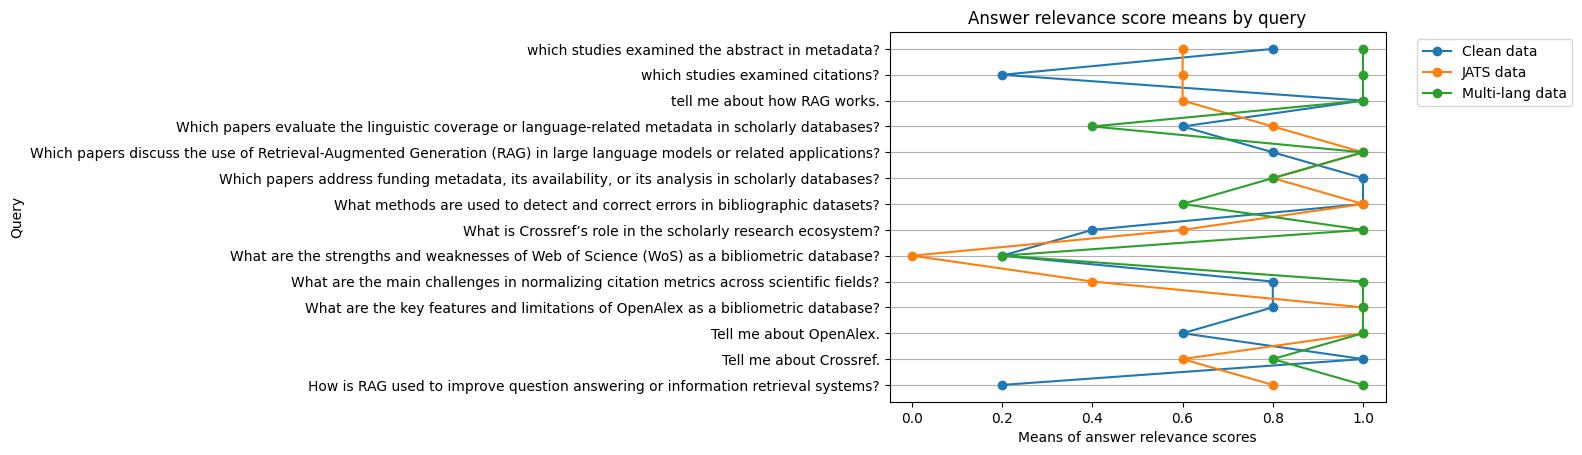

In [172]:
# let's see a plot of these values
fig,ax = plt.subplots()
plt.plot(response_grouped_together[['Relevance_data','Relevance_jats','Relevance_multi_lang']],
        response_grouped_together['Query'],
        marker='o',
        linestyle='-',data=response_grouped_together)
plt.xlabel('Means of answer relevance scores')
plt.ylabel('Query')
plt.title("Answer relevance score means by query")
ax.legend(('Clean data', 'JATS data', 'Multi-lang data'), loc='best', bbox_to_anchor=(1.05,1))
plt.grid(visible=True,axis='y')
plt.show()